# Transformando o Atendimento ao Cliente: Um Diagnóstico Baseado em Dados

## O Desafio: Melhorando a Experiência do Cliente

Uma grande empresa percebeu que sua reputação estava sendo afetada pela insatisfação dos clientes com o Serviço de Suporte. Os comentários nas redes sociais indicavam lentidão no atendimento e dificuldades na resolução de problemas. 

Para entender o que estava acontecendo, a empresa contratou uma consultoria especializada em análise de dados, buscando insights para transformar o suporte ao cliente em uma vantagem competitiva.

A missão era clara: identificar as principais oportunidades de melhoria com base em evidências concretas. Para isso, foi realizada uma análise detalhada da base de dados dados_suporte_tecnico.xlsx, extraindo informações críticas sobre os tempos de atendimento, eficiência dos atendentes e padrões de distribuição dos chamados.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.__version__

'1.2.5'

In [3]:
# Definir o número de casas decimais desejado

pd.set_option('display.float_format', '{:.2f}'.format)

## Carregando os dados

In [4]:
# Lendo os dados da planilha Excel

df = pd.read_excel('Exercicio_suporte_tecnico.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3025 entries, 0 to 3024
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   ticket_id                      3025 non-null   int64         
 1   inicio_atendimento             3025 non-null   datetime64[ns]
 2   fim_atendimento                3025 non-null   datetime64[ns]
 3   turno                          3025 non-null   object        
 4   atendente_nome                 3025 non-null   object        
 5   resolvido_na_primeira_chamada  3025 non-null   object        
 6   conversao_atendimento          3025 non-null   object        
 7   nota_csat                      3006 non-null   float64       
 8   produto                        3025 non-null   object        
 9   cliente                        3025 non-null   object        
 10  ticket_reaberto                3025 non-null   object        
 11  ticket_original  

In [5]:
df.head()

,ticket_id,inicio_atendimento,fim_atendimento,turno,atendente_nome,resolvido_na_primeira_chamada,conversao_atendimento,nota_csat,produto,cliente,ticket_reaberto,ticket_original
0,1048,2023-12-01 06:00:00,2023-12-01 06:15:00,Manhã,Carla Souza,Sim,Sim,7.00,Serviço C,Empresa X,Não,NaN
1,436,2023-12-01 06:12:00,2023-12-01 06:18:00,Manhã,Ana Paula,Sim,Sim,4.00,Serviço C,Empresa Z,Não,NaN
2,1725,2023-12-01 06:18:00,2023-12-01 06:52:00,Manhã,Maria Fernandes,Não,Não,3.00,Produto B,Empresa Y,Sim,NaN
3,1186,2023-12-01 06:19:00,2023-12-01 06:56:00,Manhã,Carla Souza,Sim,Sim,4.00,Serviço C,Empresa X,Não,NaN
4,2683,2023-12-01 06:27:00,2023-12-01 06:50:00,Manhã,Ricardo Andrade,Não,Não,2.00,Produto A,Empresa Z,Não,NaN


## Análise Univariada

O primeiro indicador a ser analisado é o **Tempo Médio de Atendimento (TMA)**, uma medida calculada para computar a duração entre o momento do início e o final do contato do atendimento.  

### a) O Tempo Médio de Atendimento (TMA) e os Quartis

Uma das principais preocupações da empresa era entender quanto tempo seus clientes esperavam por uma solução. Para isso, utilizamos o conceito de quartis, buscando responder à seguinte questão:

**Qual é o tempo de atendimento que separa os 25% dos tickets mais rápidos?**

In [6]:
# Criando uma coluna para o cálculo do TMA

df['TMA'] =  df['fim_atendimento'] - df['inicio_atendimento']

In [13]:
# Estatística descritica básica - Medidas Resumo

df['TMA'].describe()

count                         3025
mean     0 days 00:33:18.069421487
std      0 days 00:17:15.480476207
min                0 days 00:02:00
25%                0 days 00:18:00
50%                0 days 00:36:00
75%                0 days 00:48:00
max                0 days 01:00:00
Name: TMA, dtype: object

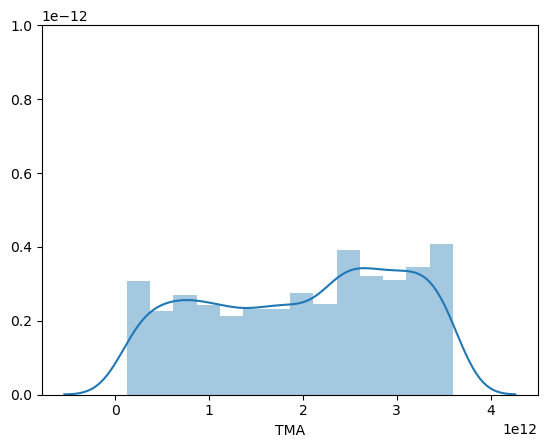

In [14]:
sns.distplot(df['TMA'])

Os dados revelaram que 25% dos atendimentos mais rápidos são resolvidos abaixo de **18 minutos**.

Isso significa que existe um grupo significativo de clientes que recebe um atendimento ágil. 
No entanto, o que acontece com os outros 75%? Essa discrepância pode indicar ineficiências no processo ou uma falta de padronização nos atendimentos.

### b) Tickets por turno de trabalho

Outra questão relevante foi identificar se há concentração de chamados em algum período do dia. Ao analisar os dados, a consultoria descobriu que:

In [8]:
# Frequencia de tickets por turno de trabalho

tabela_frequencia_turno = df['turno'].value_counts().reset_index()
tabela_frequencia_turno.columns = ['Turno', 'Frequencia Absoluta']

tabela_frequencia_turno['Frequencia Relativa'] = (
    100 * (tabela_frequencia_turno['Frequencia Absoluta'] / tabela_frequencia_turno['Frequencia Absoluta'].sum())
).apply('{:.2f}%'.format)

tabela_frequencia_turno['Frequencia Acumulada'] = (
    tabela_frequencia_turno['Frequencia Absoluta'].cumsum() / tabela_frequencia_turno['Frequencia Absoluta'].sum() * 100
).apply('{:.2f}%'.format)

tabela_frequencia_turno

,Turno,Frequencia Absoluta,Frequencia Relativa,Frequencia Acumulada
0,Noite,1289,42.61%,42.61%
1,Manhã,1022,33.79%,76.40%
2,Tarde,714,23.60%,100.00%


42,6% dos chamados estão concentrados no turno da noite, o que corresponde a quase o dobro dos atendimentos durante o período da Tarde.

Isso pode significar dois problemas:

1. **Uma sobrecarga de atendentes nesse período, causando aumento no tempo médio de atendimento.**
2. **Uma possível ineficiência na distribuição da equipe, com períodos de baixa demanda em que recursos estão subutilizados.**

Essas informações permitiram uma reavaliação da escala de trabalho, equilibrando melhor a distribuição dos atendentes ao longo do dia.

### c) Frequência de Intervalos para TMA
Para uma análise mais aprofundada, os tempos de atendimento foram classificados em três categorias:
- Baixo (2:00 a 18:00 minutos) – Atendimento rápido e eficiente.
- Médio (18:00 a 36:00 minutos) – Atendimento dentro da média, mas com espaço para otimização.
- Alto (36:00 a 48:00 minutos) ou Muito Alto (48:00 a 60:00 minutos) – Atendimentos demorados que podem gerar insatisfação.

In [9]:
# Calculando os quartis

q1 = df['TMA'].quantile(0.25)
q2 = df['TMA'].quantile(0.50)
q3 = df['TMA'].quantile(0.75)

# Criando os intervalos de classificação baseados nos quartis

df['Classificação'] = pd.cut(
    df['TMA'], bins=[df['TMA'].min(), q1, q2, q3, df['TMA'].max()], 
    labels=['Baixo', 'Médio', 'Alto', 'Muito Alto'], 
    include_lowest=True
)

# Criando a tabela de frequência dos intervalos de classificação e incluindo os valores dos quartis

tabela_classificacao_TMA = df['Classificação'].value_counts().reset_index()
tabela_classificacao_TMA.columns = ['Classificação', 'Frequência Absoluta']
tabela_classificacao_TMA['Frequência Relativa'] = (
    100 * tabela_classificacao_TMA['Frequência Absoluta'] / tabela_classificacao_TMA['Frequência Absoluta'].sum()
).apply('{:.2f}%'.format)

# Adicionando os valores dos quartis correspondentes

quartis_df = pd.DataFrame({
    'Classificação': ['Baixo', 'Médio', 'Alto', 'Muito Alto'], 
    'Limite Inferior': [df['TMA'].min(), q1, q2, q3],
    'Limite Superior': [q1, q2, q3, df['TMA'].max()]
})

# Mesclando a tabela existente com os valores dos quartis

tabela_classificacao_TMA = tabela_classificacao_TMA.merge(quartis_df, on='Classificação', how='left')

tabela_classificacao_TMA

,Classificação,Frequência Absoluta,Frequência Relativa,Limite Inferior,Limite Superior
0,Baixo,786,25.98%,0 days 00:02:00,0 days 00:18:00
1,Médio,755,24.96%,0 days 00:18:00,0 days 00:36:00
2,Alto,751,24.83%,0 days 00:36:00,0 days 00:48:00
3,Muito Alto,733,24.23%,0 days 00:48:00,0 days 01:00:00


**Os insights foram claros:**

49,06% dos chamados pertencem ao grupo "Alto" ou "Muito Alto", o que significa que uma parte relevante dos clientes está enfrentando longos tempos de espera. 

Alguns atendentes consistentemente apresentam tempos de atendimento elevados, o que pode indicar necessidade de treinamento adicional ou redistribuição de tarefas.

Isso levou a empresa a repensar seus processos internos, implementando ações para reduzir os tempos médios nos atendimentos mais demorados.

### d) Taxa de Conversão de Atendimento

Assim como o Tempo Médio de Atendimento, analisamos a Taxa de Conversão de Atendimento – ou seja, quantos chamados foram resolvidos com sucesso.

In [10]:
(df['conversao_atendimento'].value_counts()*100/df['conversao_atendimento'].count()).apply('{:.2f}%'.format)

Não    51.21%
Sim    48.79%
Name: conversao_atendimento, dtype: object

**Principais descobertas:**

- Atendentes com menor TMA tendem a apresentar maiores taxas de conversão.

- Já os chamados com tempos elevados têm menor taxa de conversão, sugerindo que clientes que aguardam muito tempo podem perder a paciência e buscar outras soluções.

Esse dado reforçou a necessidade de equilibrar **eficiência e qualidade**, garantindo que um atendimento rápido também seja eficaz.

### e) Frequência de Atendimentos por Atendente

Por fim, analisamos a frequência de chamados por atendente para identificar padrões de desempenho.

In [11]:
# Frequencia absoluta e Relativa

tabela_frequencia_atendente = df['atendente_nome'].value_counts().reset_index()
tabela_frequencia_atendente.columns = ['Atendente', 'Frequência Absoluta']
tabela_frequencia_atendente['Frequência Relativa'] = (
    100 * (tabela_frequencia_atendente['Frequência Absoluta'] / tabela_frequencia_atendente['Frequência Absoluta'].sum())
).apply('{:.2f}%'.format)

tabela_frequencia_atendente

,Atendente,Frequência Absoluta,Frequência Relativa
0,Lucas Martins,524,17.32%
1,Ana Paula,512,16.93%
2,João Silva,508,16.79%
3,Maria Fernandes,507,16.76%
4,Carla Souza,501,16.56%
5,Ricardo Andrade,473,15.64%


Existe um equilibrio entre os atendentes, a não ser por uma pequena maior participação de Lucas (17,32%) e uma menor de Ricardo (15,64%).

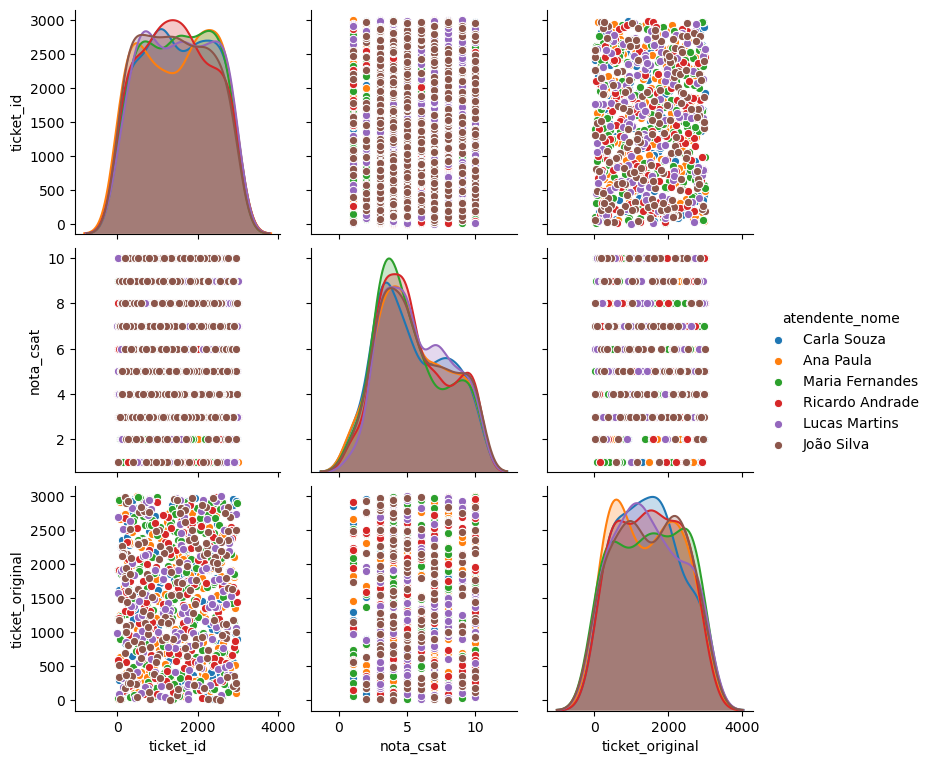

In [17]:
sns.pairplot(df,hue='atendente_nome');

## Conclusão: O Caminho para a Transformação do Suporte ao Cliente
Após essa análise detalhada, a empresa pôde visualizar claramente onde estavam os **principais pontos de melhoria** no atendimento ao cliente.

✅ **Redesenho das escalas para balancear melhor os períodos de pico.**

✅ **Treinamento personalizado para atendentes com baixa conversão.**

✅ **Revisão dos processos internos para reduzir tempos de atendimento sem comprometer a qualidade.**

Com essas ações, a empresa começou a reverter sua imagem negativa, proporcionando um suporte mais **eficiente** e aumentando a **satisfação** dos clientes.